# JBC090 Midterm

## Question 1

In [1]:
import pandas as pd
import numpy as np
import re
import spacy
from collections import Counter
from math import log

class Vectorizer(object):

  def __init__(self):
    pass

  def load_data(self, file_path, data_col, label_col): #task 1
    sentences=list(pd.read_csv(file_path)[data_col])
    sentiments=list(pd.read_csv(file_path)[label_col])
    doc=(sentences,sentiments)
    return doc

  def normalize(self, document): #task 2
    text=' '+document
    hashtags = re.findall(r" #\w{1,}\b", text)
    for hashtag in hashtags:
        # Replace the leading # with #hashtag
        transformed_hashtag = hashtag.replace("#", "#hashtag", 1)
        # Add spaces in front of capitalized letters
        transformed_hashtag = re.sub(r"([A-Z])", r" \1", transformed_hashtag)
        # Add spaces in front of number sequences
        transformed_hashtag = re.sub(r"(\d+)", r" \1", transformed_hashtag)
        # Replace the original hashtag with the transformed hashtag in the text
        text = text.replace(hashtag, transformed_hashtag)
    return text[1::]
    
  def tokenize(self, data): #task 3
    nlp = spacy.load('en_core_web_sm')
    lemmatized=[]
    for doc in data:
      lemmatized.append([])
      tokens = nlp(doc)
      for token in tokens:
        lemmatized[-1].append(token.lemma_)
    lemmatized

    for i in range(len(lemmatized)):
      j=0
      while j<len(lemmatized[i]):
        try:
          if lemmatized[i][j]=='#' and lemmatized[i][j+1]=='hashtag':
            lemmatized[i].pop(j)
            lemmatized[i][j]='#hashtag'
            j=j-1
        except: pass
        j+=1
    return lemmatized

  def cropped_vocab(self, documents, cutoff, frequency): #task 4
    strings=set()
    c=Counter()
    for a_list in documents:
      c+= Counter(a_list)
    if frequency:
      for key in c.keys():
        if c[key]>=cutoff:
          strings.add(key)
    else:
      m=max(c.values())
      for key in c.keys():
        if c[key]==m:
          strings.add(key)
    return strings

  def tfidf_vectorize(self, documents, vocab, grams): #task 5
    #remove words out of vocab
    documents_cleaned=[]
    for doc in documents:
      documents_cleaned.append([])
      for word in doc:
        if word in vocab:
          documents_cleaned[-1].append(word)
    
    #create grams
    grams_set=set()
    for doc in documents_cleaned:
      for i in range(len(doc)-grams+1):
        gram=doc[i:grams+i]
        gram=' '.join(gram)
        grams_set.add(gram)
  
    # create documents based on grams
    documents_n_grammed=[]
    for doc in documents_cleaned:
      documents_n_grammed.append([])
      for i in range(len(doc)-grams+1):
        gram=doc[i:grams+i]
        gram=' '.join(gram)
        documents_n_grammed[-1].append(gram)
    
    #create tf, sort alphabetically with T(grams)
    tf=[]
    N=len(documents)
    T = sorted(list(grams_set))

    for document in documents_n_grammed:
        vector = []
        freq_dict = Counter(document)
        for t in T:
            vector.append(freq_dict[t])
        tf.append(vector)
    tf=np.matrix(tf)

    #create wf
    wf=[]
    for i in range(N):
      wf.append([])
      for j in range(len(T)):
        wf[i].append(0)
        if tf[i,j]>0:
          wf[i][-1]+=round((1+log(tf[i,j])),3)
    wf=np.matrix(wf)

    #create df
    df=[]
    for i in range(len(T)):
      df.append(0)
      for doc in documents_n_grammed:
        if T[i] in doc:
          df[-1]+=1
    df=np.array(df)      

    #create idf
    idf=[]
    for elem in df:
      idf.append(round(1+log((N+1)/(elem+1),10),3))
    idf=np.array(idf)

    # create tf_idf
    tf_idf=wf.copy()
    for d in range(len(documents)):
      for t in range(len(vocab)):
        tf_idf[d,t]=wf[d,t]*idf[t]
    tf_idf=tf_idf.tolist()
    return tf_idf

/home/igor/.local/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Task 1

In [2]:
Vectorizer().load_data('climate.csv', data_col='text', label_col='label')

(['Why Is The Pope Upset?  via @user #UnzippedTruth #PopeFrancis #SemST',
  "We support Australia's Climate Roundtable which is providing a framework for sensible debate ahead of Paris @user #SemST",
  "It's nights like this when I'm not so fond of my long hair. I just wanna chop it all off! #heatwave #pnwgirl #SemST",
  '#Republican party will go down in history books as party that stood in the way of #gayrights and initiative to reverse #SemST',
  'RT @user @user We need degrowth - stop destroying our planet, BP. #SemST',
  '@user - #Wrong #century re the #IPCCreport & the involved #methodology I do have to say, "regards Dion #peace #ideology #SemST',
  'Thanks #MarcLevine & #Ilike_Mike for supporting legislation on #SemST',
  'That awkward moment when a pro-coal PR campaign has over 100K more followers than you do: @user #greenwashing #SemST',
  "Attenborough: 'The real problem is global' i.e. not just me, or you, but us #SemST",
  '#Technology is a sign of how far we have come! The

### Task 2 (double space, HUGE-> H U G E)

In [3]:
Vectorizer().normalize("#MainauDeclaration2015 watch out guys.. This is HUGE!! #LindauNobel #SemST")

'#hashtag Mainau Declaration 2015 watch out guys.. This is HUGE!! #hashtag Lindau Nobel #hashtag Sem S T'

### Task 3

In [4]:
Vectorizer().tokenize(
	["#hashtag Mainau Declaration 2015 watch out guys.. This is HUGE!! #hashtag Lindau Nobel #hashtag Sem S T",
   "@user Please don't let him win this. Your loyal readers support you. #hashtag Sem S T"])

[['#hashtag',
  'Mainau',
  'Declaration',
  '2015',
  'watch',
  'out',
  'guy',
  '..',
  'this',
  'be',
  'huge',
  '!',
  '!',
  '#hashtag',
  'Lindau',
  'Nobel',
  '#hashtag',
  'Sem',
  'S',
  'T'],
 ['@user',
  'please',
  'do',
  'not',
  'let',
  'he',
  'win',
  'this',
  '.',
  'your',
  'loyal',
  'reader',
  'support',
  'you',
  '.',
  '#hashtag',
  'Sem',
  'S',
  'T']]

### Task 4

In [5]:
Vectorizer().cropped_vocab([["the", "cat", "and", "the", "tree"], ["the", "cat"]], 2, True)

{'cat', 'the'}

In [6]:
Vectorizer().cropped_vocab([["the", "cat", "and", "the", "tree"], ["the", "cat"]], 1, False)

{'the'}

In [7]:
Vectorizer().cropped_vocab([["the", "cat", "and", "the", "tree"], ["the", "cat"]], 1, True)

{'and', 'cat', 'the', 'tree'}

### Task 5

In [8]:
Vectorizer().tfidf_vectorize(documents=[["the", "cat", "and", "the", "tree"]],
                             vocab={'and', 'cat', 'tree', 'the'},
                             grams=1)

[[1.0, 1.0, 1.693, 1.0]]

In [9]:
Vectorizer().tfidf_vectorize(documents=[["the", "cat", "and", "the", "tree"],
                                        ["the", "cat"]],
                             vocab={'cat', 'tree', 'the'},
                             grams=2)

[[1.176, 1.0, 1.176], [0.0, 1.0, 0.0]]

## Question 2

For each task above, **briefly**: 

- Identify a limitation of the implementation (i.e., what the code does to the data) given characteristics you can observe in the data (for task 1, discuss the dataset itself).
- Explain how this might affect downstream performance (e.g., classification accuracy) if this `Vectorizer` class were to be used in a pipeline for feature representation.

### Task 1

If passed column labels are different from ones in the actual data error will occur. Same applies to file path. If both are correct we should be fine.

Dataset contains climate change tweets and their stance on the topic (0/1/2). The mentions of usernames have been removed and '@user' was imputed instead. After a quick skim it seems like the dataset is in English.

### Task 2

Firstly the code finds all hashtags, secondly transforms '#'->'#hashtag', and adds spaces before capitalized letters or number sequences.

This could potentially connect '#hashtag' with not capitalized words e.g. '#maine' -> '#hashtagmaine' which is probably not what we aim at. Code excludes all '#' uses in the middle of the word.

Using the Vectorizer class could lead to incorrect tokenization (when hashtags starts with small letter).

Apart from this case which happens only once in the dataset, tokenization allows to catch all of the words used within a hashtag and therefore provides more data to the classifier. This leads to higher accuracy score.

### Task 3

In this exercise I used Spacy model 'en_core_web_sm' which tokenizes, and lemmatizes given documents.

The error could occur if provided data is in format different than list of strings. Other problem could occur if data fed to the model is not English. Then lemmatization would not work, but the data would be only tokenized.

If all done correctly lemmatization improves model accuracy by being able to classify different versions of 1 word e.g. 'boy' and 'boys'. Sentiment-wise words are identical meaning model is fed more relevant data, thus will return more accurate predictions when classifying labels of tweets.

### Task 4

My function firstly counts how many occurances every word had in total. Then depending on the value of 'frequency' it either return all of the words that occured more or equal amount of times as 'cutoff' value, or picks word(s) that occured the most.

The function is simple and well defined. The possibility for an error in further use of Vectorizer class could be when empty set is returned in case of big cutoff value. It should be further noted that such situation can occur. The other chance for an error is when the provided data is in incorrect format - other than (cutoff=int, frequency=bool, documents=list[list[str]])

Doing vocabulary cutoff has 2 outcomes - it changes grams further created, and it removes words that are so rarely used that they are not statistically significant to the classifier.

### Task 5

This function is the most complex so far. Here are the steps taken:

1. Removing words from documents that are not in vocab
2. Creating set of grams based on provided n value
3. Accomodating the dataset to be also represented in grams
4. Creation of tf (term frequency) matrix and sorting the columns alphabetically
5. Creation of weighted tf from given formula
6. Creation of df (document frequency) array by calculating occurances in documents
7. Creation of idf (inverse document frequency) array from given formula
8. Creation of tf*idf matrix by multiplying weighted tf matrix entries by  idf values from corresponding columns.

Given proper data the function returns smoothed tf*idf matrix so no problems should occur.

Using smoothed tfidf is not necessary but it provides information about the importance of the word in the sentence allowing the classifier to get more relevant choices, and improving overall accuracy.

## Question 3

In [10]:
from sklearn.base import BaseEstimator, ClassifierMixin
import gensim.downloader as api
import numpy as np


class KNN(BaseEstimator, ClassifierMixin):

    def __init__(self, n_neighbors, metric, voting, embeddings):
        self.n_neighbors = n_neighbors
        self.metric = metric
        self.voting = voting
        self.embeddings = embeddings
        self.data = None

    def embed(self, X): #Task 6
        if type(X[0][0])==int:
            return X
        else:
            means=[]
            for doc in X:
                means.append(0)
                for word in doc:
                    means[-1]+=self.embeddings[str(word)]
                means[-1]=means[-1]/len(doc)
            return means

    def distance(self, a, b): #Task 7
        distance_e=0
        for i in range(len(a)):
            distance_e+=(a[i]-b[i])**2
        distance_e=np.sqrt(distance_e)

        similarity_c=0
        a=np.array(a)
        b=np.array(b)
        similarity_c=(sum(a*b))/(np.sqrt(sum(a**2))*np.sqrt(sum(b**2)))
        distance_c=1-similarity_c

        if self.metric=='euclidean':
            return distance_e
            
        return distance_c

    def vote(self, y, distances): #Task 8
        if self.voting=='majority':
            predicted_class=max(set(y), key = y.count)

        else:
            sums={}
            for i in range(len(y)):
                try:
                    sums[y[i]]+=distances[i]
                except:
                    sums[y[i]]=distances[i]
            mini=min(sums.values())
            for key in sums.keys():
                if sums[key]==mini:
                    predicted_class=key
                    break

        return predicted_class

    def fit(self, X, y): #Task 9
        k=[]
        for i in range(len(X)):
            k.append((X[i],y[i]))
        self.data=tuple(k)
        return self

    def predict(self, x): # Task 10
        
        X_train=[]
        y_train=[]
        for data in self.data:
            X_train.append(data[0])
            y_train.append(data[1])
        
        #calculate distances
        distances=[]
        for vector in X_train:
            distances.append(self.distance(x,vector))
        
        #sorting lists in ascending order in distances
        zipped=zip(distances,y_train)
        sorted_by_distances=sorted(zipped)
        tuples=zip(*sorted_by_distances)
        distances,y_train=[list(tuple) for tuple in tuples]

        #n closest neighbours
        distances=distances[:self.n_neighbors:]
        y_train=y_train[:self.n_neighbors:]

        #voting
        predicted_class=self.vote(y_train,distances)
        return predicted_class

### Task 6

In [11]:
knn = KNN(n_neighbors=1, metric='euclidean', voting='majority', embeddings=None)
knn.embed([[1, 3, 1], [2, 5, 1]])

[[1, 3, 1], [2, 5, 1]]

In [12]:
knn = KNN(n_neighbors=1, metric='euclidean', voting='majority',
          embeddings=api.load("glove-wiki-gigaword-50"))
knn.embed([["some", "words"], ["more", "words"]])

[array([ 0.4302755 ,  0.278235  ,  0.07624599, -0.53532004,  0.45293498,
         0.174475  , -0.01607502, -0.36265498, -1.143885  ,  0.0671399 ,
        -0.672415  ,  0.13274   ,  0.385645  , -0.535125  ,  0.76552   ,
        -0.10582951, -0.15580001, -0.1283925 , -0.0670545 , -0.932665  ,
        -0.24128655,  0.234175  ,  0.770005  ,  0.0350785 ,  0.797054  ,
        -1.35175   , -0.87857   ,  0.05192   ,  0.171665  , -0.56752   ,
         3.5475502 , -0.084205  ,  0.0969075 , -0.189515  , -0.05066001,
         0.017085  , -0.01328   , -0.46688503, -0.359995  ,  0.21226001,
         0.316065  ,  0.47280002,  0.2190455 ,  0.727115  ,  0.207505  ,
         0.1757746 , -0.03124   ,  0.68943   , -0.621915  , -0.26435363],
       dtype=float32),
 array([ 4.05635506e-01,  2.76524991e-01,  1.85661003e-01, -4.98730004e-01,
         6.10984981e-01,  1.69984996e-01,  7.12150037e-02, -5.22059977e-01,
        -1.02621007e+00,  2.48769894e-01, -6.65279984e-01,  2.86599994e-02,
         3.2230499

### Task 7

In [13]:
knn = KNN(n_neighbors=1, metric='euclidean', voting='majority', embeddings=None)
knn.distance([1, 3, 1], [2, 5, 1])

2.23606797749979

In [14]:
knn = KNN(n_neighbors=1, metric='cosine', voting='majority', embeddings=None)
knn.distance([1, 3, 1], [2, 5, 1])

0.009132611386275413

### Task 8

In [15]:
knn = KNN(n_neighbors=1, metric='euclidean', voting='majority', embeddings=None)
knn.vote([1, 1, 2, 1, 2, 0, 1, 1, 0],
         [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.2, 0.1, 0.1])

1

In [16]:
knn = KNN(n_neighbors=1, metric='euclidean', voting='weighted', embeddings=None)
knn.vote([1, 1, 2, 1, 2, 0, 1, 1, 0],
         [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.2, 0.1, 0.2])

2

### Task 9

In [17]:
knn = KNN(n_neighbors=1, metric='cosine', voting='weighted', embeddings=None)
knn.fit([[5, 6], [10, 12]], [1, 2])

KNN(embeddings=None, metric='cosine', n_neighbors=1, voting='weighted')

In [18]:
knn = KNN(n_neighbors=1, metric='cosine', voting='weighted', embeddings=None)
knn.fit([[5, 6], [10, 12]], [1, 2]).data

(([5, 6], 1), ([10, 12], 2))

### Task 10

In [19]:
knn = KNN(n_neighbors=1, metric='euclidean', voting='majority', embeddings=None)
knn.fit([[1, 3, 1], [2, 5, 1]], [0, 1])
knn.predict([1, 2, 1])

0

## Question 4

I decided to predict labels of provided tweets based on their bodies.

1. Steps taken
    - Normalization and tokenization of data using functions from Q1
    - Obtaining tfidf using previous functions
    - Splitting data using 5-Fold CV
    - Training and testing 5 models
    - Obtaining average metrics + confusion matrix
    - Tuning amount of grams used in the model
    
2. I chose Gaussian Naive Bayes model as classifier since the data is labeled (supervised learning), and the y (label) is not binary. I also decided to vectorize tweets using functions from Q1, since they vectorization, and lemmatization with smoothing is all one can do to improve predictions. I decided to use K-Fold CV with k=5 so that I get somewhat average model performance score. Later I compared model performances using different amount of grams, and vocabulary cutoff.

3. When evaluating model's performance I only used accuracy to see how well it does and confusion matrix to check how are the errors distributed, since labels are not binary. The most accurate model turned out to be 2-gram with no vocabulary cutoff (68% accuracy).

In [20]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sn

data=Vectorizer().load_data('climate.csv', data_col='text', label_col='label')
X,y=data[0],data[1]

X_normalized=[]
for doc in X:
  X_normalized.append(Vectorizer().normalize(doc))

X=Vectorizer().tokenize(X_normalized)

vocab=Vectorizer().cropped_vocab(X, 1, True)
X=Vectorizer().tfidf_vectorize(X, vocab, 2)

In [21]:

def predict(X_train,X_test,y_train,y_test):
  gnb=GaussianNB()
  model=gnb.fit(X_train,y_train)
  y_pred=model.predict(X_test)

  conf_matrix=confusion_matrix(y_test,y_pred,normalize='all')
  accuracy=accuracy_score(y_test,y_pred)
  return accuracy,conf_matrix

# X_train, X_test, y_train, y_test=train_test_split(X,y)
# predict(X_train,X_test,y_train,y_test)

In [22]:
kf=KFold(n_splits=5)
scores=0
mtr=0

for i, (train_index,test_index) in enumerate(kf.split(X)):
  X_train=[]
  X_test=[]
  y_train=[]
  y_test=[]

  for idx_tr in train_index:
    X_train.append(X[idx_tr])
    y_train.append(y[idx_tr])

  for idx_te in test_index:
    X_test.append(X[idx_te])
    y_test.append(y[idx_te])


  perf=predict(X_train,X_test,y_train,y_test)
  scores+=perf[0]
  try:
    mtr+=perf[1]
  except:
    mtr=perf[1]

avg_acc=scores/5
mtr=mtr/5

In [23]:
avg_acc

0.6790929203539824

<AxesSubplot:>

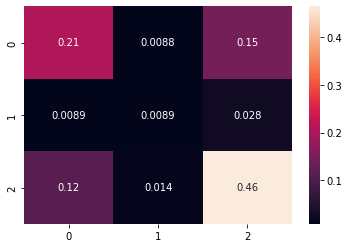

In [24]:
sn.heatmap(mtr,annot=True)